In [16]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

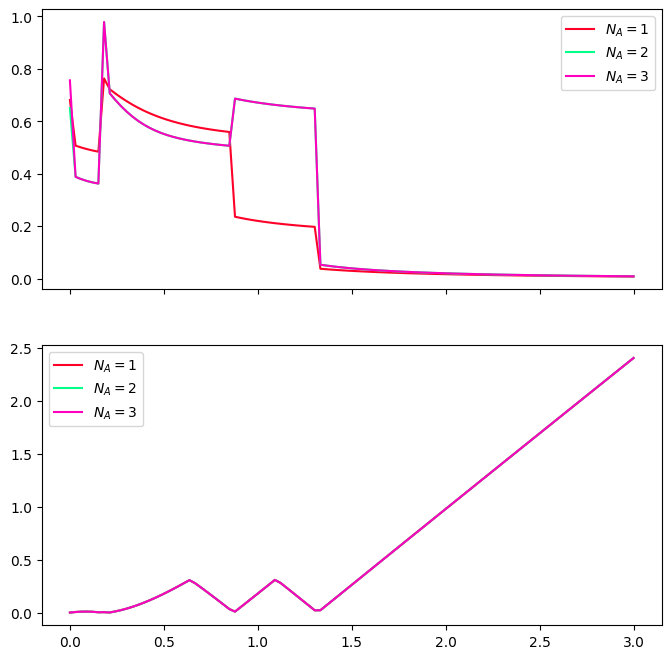

In [45]:
def von_neumann_entropy(rho_A):
    eigenvalues = np.linalg.eigvalsh(rho_A)
    eigenvalues = eigenvalues[eigenvalues > 1e-10]  # Avoid log(0)
    return -np.sum(eigenvalues * np.log(eigenvalues))

N = 5
M = 3

N_A = 2

V = 1
J_V_ratios = np.linspace(0,3,100)
mu_V_ratio = 0
N_As = [1,2,3]

fig, (ax1,ax2) = plt.subplots(figsize = (8,8), nrows = 2, sharex=True)
for i, N_A in enumerate(N_As):
    colors = get_cmap("gist_rainbow", len(N_As))
    entropies = []
    energy_gaps = []
    for J_V_ratio in J_V_ratios:

        ham = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio,J_V_ratio)
        eigenvals, eigenvectors = exact_diagonalize(ham)

        ground_state = eigenvectors[0]
        reshaped_ground_state = ground_state.reshape((M**N_A, M**(N-N_A)))

        rho_A = reshaped_ground_state @ reshaped_ground_state.conj().T
        
        entropy = von_neumann_entropy(rho_A)
        entropies += [entropy]
        
        energy_gap = eigenvals[1]-eigenvals[0]
        energy_gaps += [energy_gap]
        
    ax1.plot(J_V_ratios,entropies, color = colors(i), label = f"$N_A = {N_A}$")
    ax2.plot(J_V_ratios, energy_gaps, color = colors(i), label = f"$N_A = {N_A}$")
ax1.legend(loc = "upper right")
ax2.legend()